<a href="https://colab.research.google.com/github/sherryHuan/CS4410/blob/main/Lab_3_%5BSOLUTIONS%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab #3: Review and Titanic Project**
---

### **Description:**
In this lab, you will hone and apply your skills through review and your first official project, particularly working with a famous dataset containing data about the Titanic.

<br>

### **Lab Structure**

**Part 1**: [[OPTIONAL] Exploratory Data Analysis Review](#p1)

**Part 2**: [[OPTIONAL] Data Cleaning + Wrangling Review](#p2)

**Part 3**: [[OPTIONAL] Data Visualization Review](#p3)

**Part 4**: [Titanic Project](#p4)



<br>

## **Goals**
By the end of this lab, you will:
* Understand how to engineer features to better represent characteristics of the data.
* Know how to use visualizations to study trends in the data.
* Understand what role different factors (features) played in the survival of passengers aboard the Titanic.

<br>

### **Cheat Sheets**
* [Data Visualization with matplotlib](https://docs.google.com/document/d/1IA-sgjUvrQYyKlcBxFN-PIsHMEMrixwd6sh9RlMkubQ/edit?usp=drive_link)

* [Exploratory Data Analysis with pandas](https://docs.google.com/document/d/1hMsWa7ziMulT0WjoCaqLTkpoqilCO12HlOrVy4-_zwY/edit?usp=drive_link)

* [Python Basics](https://docs.google.com/document/d/1jC6zIdBukfEoJ8CesGf_usCtK2P6pJTWe5oxopC49aY/edit?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries as well as today's datasets.**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest


data = pd.read_csv("https://raw.githubusercontent.com/n-sachdeva/titanic/main/train.csv")

<a name="p1"></a>

---
## **Part 1: [OPTIONAL] Exploratory Data Analysis Review**
---


**Run the code cell below to create the DataFrame.**

In [ ]:
# Create a Pandas dataframe from the dictionary
df = pd.DataFrame({'U.S. State': ['California', 'Florida', 'Indiana', 'Texas', 'Pennsylvania'],
        'Population (in millions)': [38, 21, 6.5, 28, 13],
        'Capitol': ['Sacramento', 'Tallahassee', 'Indianapolis', 'Austin', 'Harrisburg'],
        'GDP ($ in billions)': [3700, 1070, 352, 1876, 726]})

### **Problem #1.1**

What does `.head()` tell you about this DataFrame?

#### **Solution**

In [ ]:
df.head(3)

,U.S. State,Population (in millions),Capitol,GDP ($ in billions)
0,California,38.0,Sacramento,3700
1,Florida,21.0,Tallahassee,1070
2,Indiana,6.5,Indianapolis,352


### **Problem #1.2**

What is the datatype of `Population (in millions)`?

#### **Solution**

In [ ]:
# float
df.dtypes

### **Problem #1.3**

What is the average `Population (in millions)` size among the U.S. states in the dataset?

#### **Solution**

In [ ]:
#21.3 million
df['Population (in millions)'].mean()

#OR

df.describe()

### **Problem #1.4**

Explore rows 4 and 5. What are the U.S. States listed?

#### **Solution**

In [ ]:
#Texas and Pennsylvania

df.iloc[3:5]

,U.S. State,Population (in millions),Capitol,GDP ($ in billions)
3,Texas,28.0,Austin,1876
4,Pennsylvania,13.0,Harrisburg,726


### **Problem #1.5**

Print all of the unique values for `GDP ($ in billions)`.

#### **Solution**

In [ ]:
df['GDP ($ in billions)'].unique()

array([3700, 1070,  352, 1876,  726])

### **Problem #1.6**

What are the column names in the dataset?

In [ ]:
# column names

#### **Solution**

In [ ]:
df.columns

Index(['U.S. State', 'Population (in millions)', 'Capitol',
       'GDP ($ in billions)'],
      dtype='object')

### **Problem #1.7**

What is the total population across all states?

In [ ]:
# total population

#### **Solution**

In [ ]:
# 106.5 million
df['Population (in millions)'].sum()

106.5

### **Problem #1.8**

Which is the highest GDP in the dataset?

In [ ]:
# highest GDP

#### **Solution**

In [ ]:
# 3.7 trillion
df['GDP ($ in billions)'].describe()

count       5.000000
mean     1544.800000
std      1329.776372
min       352.000000
25%       726.000000
50%      1070.000000
75%      1876.000000
max      3700.000000
Name: GDP ($ in billions), dtype: float64

### **Problem #1.9**

What is the average population of the states?

In [ ]:
# average population

#### **Solution**

In [ ]:
# 21.3 million
df['Population (in millions)'].mean()

21.3

### **Problem #1.10**

What is the `Population (in millions)` for the 3rd state in the dataset?

In [ ]:
# population of 3rd state

#### **Solution**

In [ ]:
# 6.5 million
df.iloc[2]

U.S. State                       Indiana
Population (in millions)             6.5
Capitol                     Indianapolis
GDP ($ in billions)                  352
Name: 2, dtype: object

### **Problem #1.11**

Which states are included in this dataset?

In [ ]:
# list of states

#### **Solution**

In [ ]:
# California, Florida, Indiana, Texas, Pennsylvania
df['U.S. State'].unique()

array(['California', 'Florida', 'Indiana', 'Texas', 'Pennsylvania'],
      dtype=object)

### **Problem #1.12**

What is the range of GDP values among the states?

In [ ]:
# range of GDP values

#### **Solution**

In [ ]:
# 352 billion to 3.7 trillion
df['GDP ($ in billions)'].describe()

count       5.000000
mean     1544.800000
std      1329.776372
min       352.000000
25%       726.000000
50%      1070.000000
75%      1876.000000
max      3700.000000
Name: GDP ($ in billions), dtype: float64

### **Problem #1.13**

How many states have a population greater than 20 million?

In [ ]:
# list of states with population greater than 20 million


#### **Solution**

In [ ]:
# California, Florida, Texas
df.loc[df['Population (in millions)'] > 20]

,U.S. State,Population (in millions),Capitol,GDP ($ in billions)
0,California,38.0,Sacramento,3700
1,Florida,21.0,Tallahassee,1070
3,Texas,28.0,Austin,1876


### **Problem #1.14**

Explore the last row in the dataset.

In [ ]:
# last row

#### **Solution**

In [ ]:
df.iloc[4]

U.S. State                  Pennsylvania
Population (in millions)            13.0
Capitol                       Harrisburg
GDP ($ in billions)                  726
Name: 4, dtype: object

### **[Challenge Question] Problem #1.15**

What is the average `GDP per capita` for the states? Divide `GDP per capita` by `Population (in millions)`.

In [ ]:
# average GDP per capita

#### **Solution**

In [ ]:
# 65.06
df['GDP per capita'] = df['GDP ($ in billions)'] / df['Population (in millions)']
df['GDP per capita'].mean()

65.06416040100251

<a name="p2"></a>

---
## **Part 2: [OPTIONAL] Data Cleaning + Wrangling Review**
---

**Run the cell below to load in the dataframe.**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

movie_df.drop_duplicates(inplace=True)

mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

movie_df.head()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


### **Problem #2.1**

Assuming 15% of the `No_of_Votes` are online votes, create a new column for `Online Votes`.

#### **Solution**

In [ ]:
movie_df['Online Votes'] = movie_df['No_of_Votes'] * .15
movie_df

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Online Votes
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469,351466.50
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411,243055.05
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444,345484.80
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000,169492.80
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000,103476.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835,24981.60
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224,5111.25
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000,6506.10
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424,3970.65


### **Problem #2.2**


Create a new feature called `Runtime (hr)` that converts `Runtime (min)` to hours by dividing that data by 60.

In [ ]:
movie_df['Runtime (hr)'] = # COMPLETE THIS LINE

#### **Solution**

In [ ]:
movie_df['Runtime (hr)'] = movie_df['Runtime (min)'] / 60

### **Problem #2.3**

Create a new feature called `Dollar_Per_Hour` that stores the result of dividing `Gross` by `Runtime (hr)`.

In [ ]:
# COMPLETE THIS CODE

#### **Solution**

In [ ]:
movie_df['Dollar_Per_Hour'] = movie_df['Gross'] / movie_df['Runtime (hr)']

### **Problem #2.4**

Remove the `Director` column.



#### **Solution**

In [ ]:
movie_df.drop('Director', axis = 1)

### **Problem #2.5**

Create a new feature `IMDB Rating out of 100` that multiplies `IMDB_Rating` by 10.

#### **Solution**

In [ ]:
movie_df['IMDB Rating out of 100'] = movie_df['IMDB_Rating'] * 10
movie_df.head()

### **Problem #2.6**

Create a new feature `Age` that subtracts the `Released_Year` from the current year.

#### **Solution**

In [ ]:
movie_df['Age'] = 2023 - movie_df['Released_Year']
movie_df.head()

### **Problem #2.7**

Drop rows with **any** missing data. **HINT:** Run the **.shape** attribute before and after dropping any rows so you can easily determine if any rows were dropped.

#### **Solution**

In [ ]:
# 1000 rows before/after null rows are dropped, no rows were missing any data
movie_df.shape

movie_df.dropna(axis = 0, how = 'any')

### **Problem #2.8**

Drop the `Overview` column.

#### **Solution**

In [ ]:
movie_df.drop(columns = 'Overview')

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835
1003,Giant,1956,201,Drama,7.6,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224
1004,From Here to Eternity,1953,118,Drama,7.6,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000
1005,Lifeboat,1944,97,Drama,7.6,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424


### **Problem #2.9**

Rename each of the following column headers so that all underscores are removed: `Series_Title`, `Released_Year`, `IMDB_Rating`, and `No_of_Votes`.

#### **Solution**

In [ ]:
movie_df = movie_df.rename(columns={"Series_Title": "Series Title", "Released_Year": "Released Year", "IMDB_Rating": "IMDB Rating", "No_of_Votes": "Number of Votes"})
movie_df

,Series Title,Released Year,Runtime (min),Genre,IMDB Rating,Overview,Director,Star1,Star2,Star3,Star4,Number of Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,Breakfast at Tiffany's,1961,115,Comedy,7.6,A young New York socialite becomes interested ...,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,1378835
1003,Giant,1956,201,Drama,7.6,Sprawling epic covering the life of a Texas ca...,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,13780224
1004,From Here to Eternity,1953,118,Drama,7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000
1005,Lifeboat,1944,97,Drama,7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,13780424


### **Problem #2.10**

Drop any duplicate rows from the dataframe.

#### **Solution**

In [ ]:
movie_df.drop_duplicates(inplace=True)

### **Problem #2.11**

Convert the `Released Year` column to an object data type.

#### **Solution**

In [ ]:
movie_df['Released Year'] = movie_df['Released Year'].astype(object)

<a name="p3"></a>

---
## **Part 3: [OPTIONAL] Data Visualization Review**
---

**Run the cell below to load in the data**

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS9jPkeKJ8QUuAl-fFdg3nJPDP6vx1byvIBl4yW8UZZJ9QEscyALJp1eywKeAg7aAffwdKP63D9osF1/pub?gid=169291584&single=true&output=csv"
movie_df = pd.read_csv(url)

movie_df.drop_duplicates(inplace=True)

mean_runtime = movie_df['Runtime'].mean()
movie_df['Runtime'] = movie_df['Runtime'].fillna(mean_runtime)

movie_df = movie_df.rename(columns = {"Runtime": "Runtime (min)"})
movie_df = movie_df.astype({"Runtime (min)": "int64"})

movie_df.head()

,Series_Title,Released_Year,Runtime (min),Genre,IMDB_Rating,Overview,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,175,Crime,9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,152,Action,9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,202,Crime,9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,96,Crime,9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


### **Problem #3.1**

Create a scatterplot using `Runtime (min)` as the x-axis value and `Gross` as the y-axis value.

Make sure to include a meaningful:
* `Title`: "Gross Money vs. Runtime:
* `X-axis`: "Gross (USD)"
* `Y-axis`: "Runtime (min)"

#### **Solution**

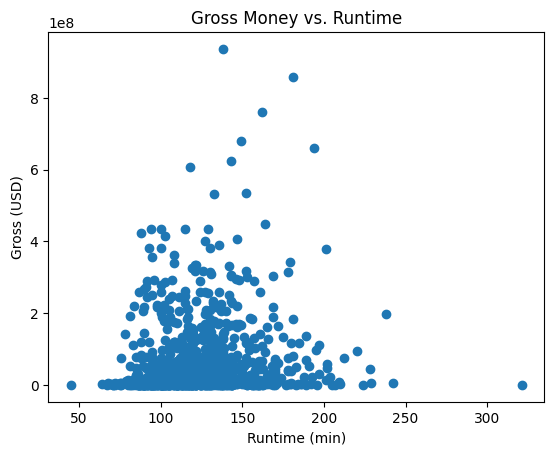

In [ ]:
plt.scatter(movie_df['Runtime (min)'], movie_df['Gross'])

plt.title("Gross Money vs. Runtime")
plt.xlabel('Runtime (min)')
plt.ylabel('Gross (USD)')

plt.show()

### **Problem #3.2**

Create a scatterplot using `Released_Year` as the x-axis value and `Runtime (min)` as the y-axis value.

Make sure to include a meaningful:
* `Title`: "Runtime vs. Released_Year"
* `X-axis`: "Year"
* `Y-axis`: "Runtime (min)"

#### **Solution**

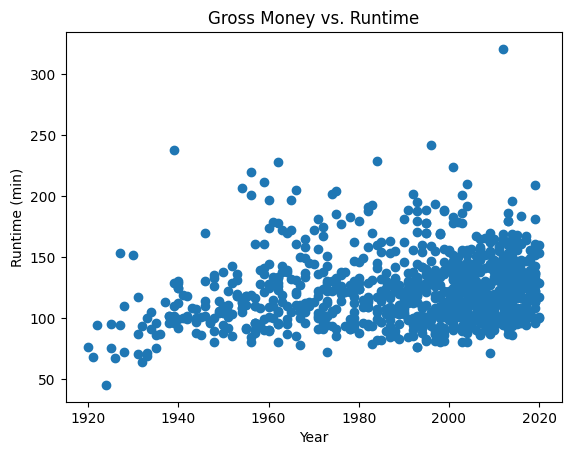

In [ ]:
plt.scatter(movie_df['Released_Year'], movie_df['Runtime (min)'])

plt.title("Gross Money vs. Runtime")
plt.xlabel('Year')
plt.ylabel('Runtime (min)')

plt.show()

### **Problem #3.3**

Create a *lineplot* using `Runtime (min)` as the x-axis value and `Gross` as the y-axis value.

Make sure to include a meaningful:
* Title, ex: `'Gross Money vs. Runtime'`.
* X-axis label including units `'min'`.
* Y-axis label including units `'USD'`.

<br>

**NOTE**: This is not going to be a particularly helpful graph (the scatter plot is a better choice), but we oftentimes will not know this ahead of time. A lot of EDA and visualizations involves trying a number of things and seeing what is useful.

#### **Solution**

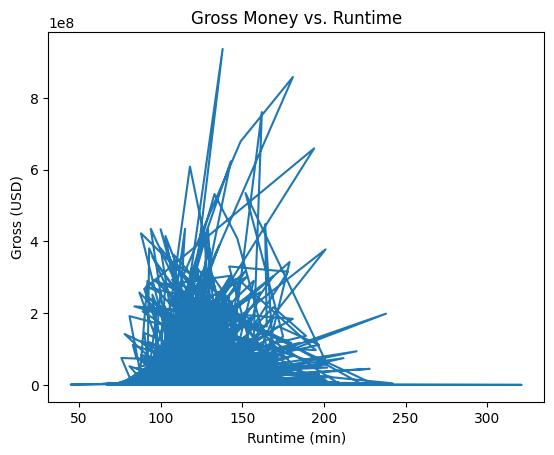

In [ ]:
plt.plot(movie_df['Runtime (min)'], movie_df['Gross'])

plt.title("Gross Money vs. Runtime")
plt.xlabel('Runtime (min)')
plt.ylabel('Gross (USD)')

plt.show()

### **Problem #3.4**

Create a *lineplot* using `Released_Year` as the x-axis value and `Average Gross in Year` as the y-axis value.

Make sure to include a meaningful:
* Title, ex: `'Average Gross Money vs. Released Year'`.
* X-axis label.
* Y-axis label including units `'USD'`.

In [ ]:
mean_gross = movie_df.groupby('Released_Year')['Gross'].mean() # average gross in year

# COMPLETE THIS CODE


#### **Solution**

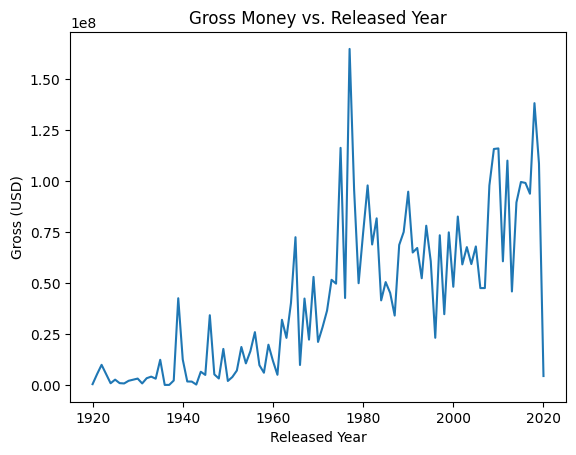

In [ ]:
mean_gross = movie_df.groupby('Released_Year')['Gross'].mean()

plt.plot(mean_gross.index, mean_gross)

plt.title("Gross Money vs. Released Year")
plt.xlabel('Released Year')
plt.ylabel('Gross (USD)')

plt.show()

### **Problem #3.5**

Create a bar plot of the number of movies released per year.

Use the DataFrame provided, `movies_per_year` and make sure to include a meaningful:
* Title.
* X-axis label.
* Y-axis label.

In [ ]:
movies_per_year = movie_df['Released_Year'].value_counts()

plt.bar(movies_per_year.index, # COMPLETE THIS CODE

#### **Solution**

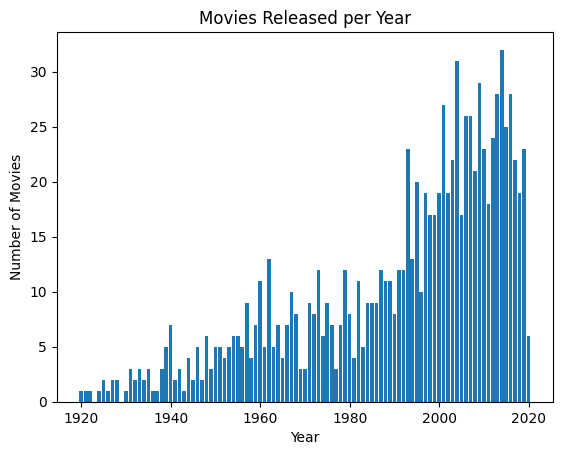

In [ ]:
movies_per_year = movie_df['Released_Year'].value_counts()

plt.bar(movies_per_year.index, movies_per_year)

plt.title('Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.show()

<a name="p4"></a>

---
## **Part 4: Titanic Project**
---

In the following parts, you will hone and apply your skills to a famous dataset containing information about passengers on the Titanic and whether they survived or not: [Titanic dataset from Kaggle](https://www.kaggle.com/competitions/titanic/overview).


<br>

There are twelve columns in the dataset. The target column is `Survived` which indicates if a passenger survived (1) or not (0). The features initially available are:

* `PassengerId`: Numeric, a unique number for each passenger.
* `Pclass`: Numeric, the ticket class.	1 = 1st, 2 = 2nd, 3 = 3rd.
* `Name`: Categorical, the name of the passenger.
* `Sex`: Categorical, the sex of the passenger.
* `Age`: Numeric, the passenger's age in years.
* `Sibsp`: Numeric, the number of siblings / spouses aboard the Titanic.
* `Parch`: Numeric, the number of parents / children aboard the Titanic.
* `Ticket`: Categorical, ticket number.
* `Fare`: Numeric, passenger fare.
* `Cabin`: Categorical, cabin number.
* `Embarked`: Categorical, port of embarkation.	C = Cherbourg, Q = Queenstown, S = Southampton.


<br>

To help us decide how to clean our data, we will start with some *light* EDA. Then we will drop any duplicates and unnecessary columns and fill in any values as needed.

### **Problem #4.1**

Print the first 10 rows of the data.

#### **Solution**

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### **Problem #4.2**

Next, let's check if we have any missing values using the `info()` function.

#### **Solution**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
### **General Questions To Think About**

At this point in the process, it's generally good to consider:

* Which columns contain missing values?
* Why might it not be a good idea to drop all rows with a missing value?
* For a numerical feature, what can you fill the missing values with?
* For a categorical feature, what can you fill the missing values with?
* Are there any columns will not be useful for the analysis? If so, why?


<br>

**Now that we have some basic information on our dataset, let's do some data cleaning and wrangling.**

### **Problem #4.3**

Remove duplicates using `drop_duplicates()`.

#### **Solution**

In [ ]:
data.drop_duplicates(inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


### **Problem #4.4**

Drop the following unnecessary columns: `PassengerId`, `Name`, and `Ticket`.

#### **Solution**

In [ ]:
#data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace = True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Problem #4.5**

Fill missing values in the `Embarked` column with the most frequent value (mode).


In [ ]:
most_frequent = data['Embarked'].mode()[0]

# COMPLETE THIS CODE

0    S
Name: Embarked, dtype: object


#### **Solution**

In [ ]:
most_frequent = data['Embarked'].mode()[0]

data['Embarked'] = data['Embarked'].fillna(most_frequent)

### **Problem #4.6**

Fill missing values in the `Age` column with the median value.


In [ ]:
median_age = data['Age'].median()

# COMPLETE THIS CODE

#### **Solution**

In [ ]:
median_age = data['Age'].median()

data['Age'] = data['Age'].fillna(median_age)

### **Problem #4.7**

Create a new feature `FamilySize` by adding the columns `SibSp` and `Parch` and including the ticket-holder themselves.


#### **Solution**

In [ ]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

### **Problem #4.8**

Create a new feature 'AgeClass' which is the product of 'Age' and 'Pclass'. This feature can be useful as it combines age and class, two important factors for survival.


#### **Solution**

In [ ]:
data['AgeClass'] = data['Age'] * data['Pclass']

### **Problem #4.9**

Create a new feature 'HasCabin' which is True if the 'Cabin' information does not exist (NaN) and False otherwise.

#### **Solution**

In [ ]:
data['HasCabin'] = ~data['Cabin'].notnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,True


### **Problem #4.10**

The `Age` column is in float format. Convert the `Age` column to integer data type.

####**Solution**

In [ ]:
data['Age'] = data['Age'].astype(int)

### **Now, we will explore and visualize the data to gain insight into what factors contribute to a passenger's survival.**


**NOTE**: Because we will eventually use this data to build ML models, it is necessary to split the data into a training and validation set *before* we do EDA. Not doing so is an example of how data leakage can occur.

We can split the dataframe in `pandas` using the `sample()` function. **You do not need to remember this.**


**Run the code below to split the dataset.**

In [ ]:
train = data.sample(frac = 0.8)

# Creating dataframe with the remaining 20%
validation = data.drop(train.index)

### **Problem #4.11**

Create a bar plot that shows passenger counts by their sex.

**Hint:** Use `value_counts()`.

In [ ]:
mf_counts = train# COMPLETE THIS LINE


plt.bar(mf_counts.index, mf_counts.values)

plt.title(# COMPLETE THIS LINE
plt.xlabel(# COMPLETE THIS LINE
plt.ylabel(# COMPLETE THIS LINE

plt.show()

#### **Solution**

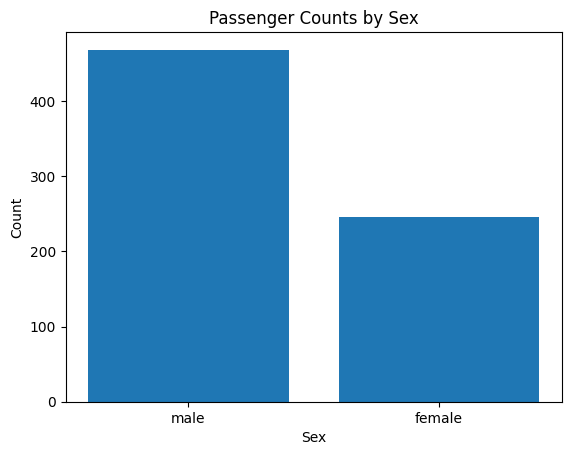

In [ ]:
mf_counts = train['Sex'].value_counts()


plt.bar(mf_counts.index, mf_counts.values)

plt.title('Passenger Counts by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()

### **Problem #4.12**

Make a scatter plot of `Age` vs. `Fare`.

#### **Solution**

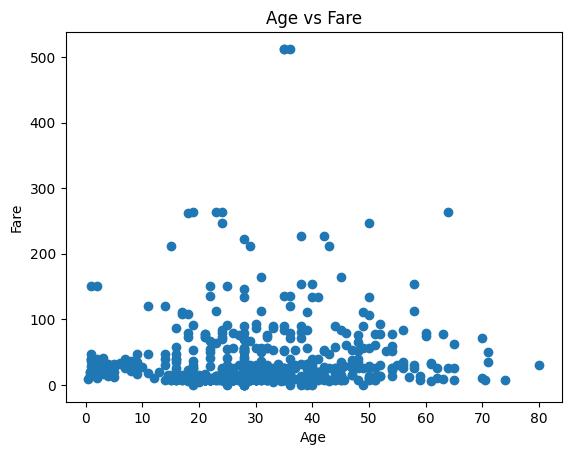

In [ ]:
plt.scatter(train['Age'], train['Fare'])

plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')

plt.show()

### **Define the `plot_survival(column)` function.**

To wrap up, you will need to answer several questions about this dataset using your work above, what you have learned about pandas and matplotlib, and a plotting function we've defined below.

<br>

This function, `plot_survival(column)` makes bar plots of survival rates and counts of any categorical variable passed in as `column`.

**Run the code below to define this plotting function.**

In [ ]:
def plot_survival(column):
  survival_rate = train.groupby(column)['Survived'].mean()


  # create a bar plot for survival rate
  fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))
  ax1.bar(x=survival_rate.index, height=survival_rate.values, color=['tab:blue'])
  ax1.set_ylabel('Survival rate')
  ax1.set_xlabel(column)

  # create a count plot for a given column
  counts = train.groupby([column, 'Survived']).size().unstack()
  width = 0.5
  x = counts.index
  survived = counts[1]
  not_survived = counts[0]
  ax2.bar(x, survived, width, label='Survived', color='tab:blue')
  ax2.bar(x, not_survived, width, bottom=survived, label='Not Survived', color='tab:orange')

  # set the labels and legend
  ax2.set_ylabel('Counts')
  ax2.set_xlabel(column)
  ax2.legend()
  plt.show()

**Below is an example of how to use the function. Run the cell below to plot survival by sex.**

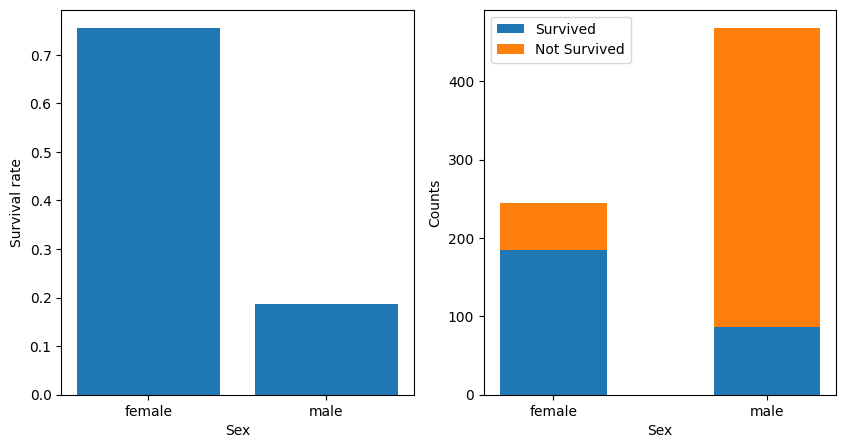

In [ ]:
plot_survival('Sex')

### **Problem #4.13**

How many passengers survived vs. didn't survive?

**Hint**: This is a matter of *counting* how many *values* of the `Survived` column are 0 (didn't survive) vs. 1 (did survive).

#### **Solution**

In [ ]:
train['Survived'].value_counts()

0    441
1    272
Name: Survived, dtype: int64

### **Problem #4.14**

How did passenger class affect survival rates?

**Hint**: This is the kind of question that the `plot_survival(column)` function can help with. Furthermore, if you don't remember an exact column name off the top of your head, it can be useful to print out `train.columns` to see a list of all available columns.

#### **Solution**

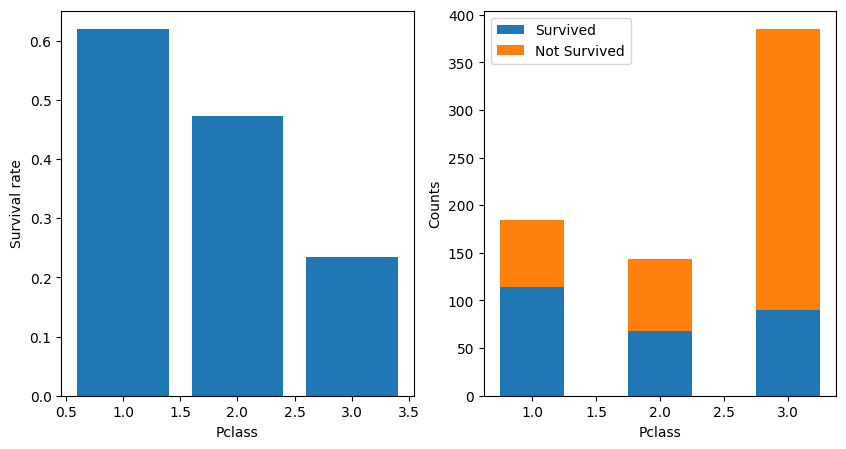

In [ ]:
plot_survival('Pclass')

### **Problem #4.15**

How did having family members onboard affect survival rates?

#### **Solution**

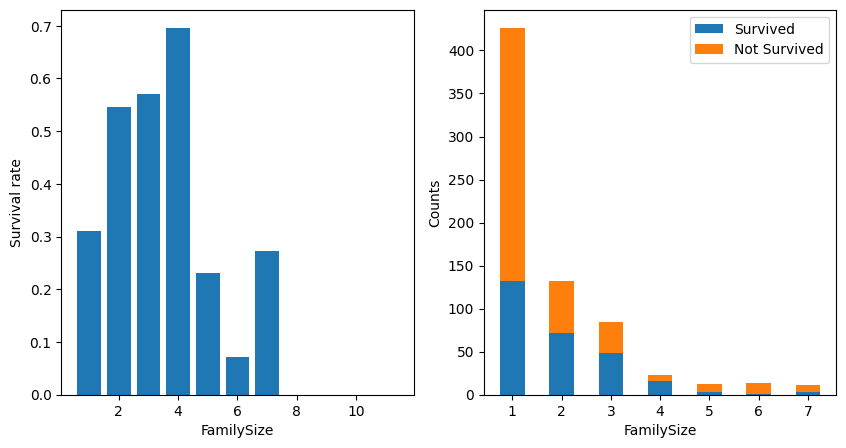

In [ ]:
plot_survival('FamilySize')

### **Problem #4.16**

How did the port of embarkation affect survival rates?

#### **Solution**

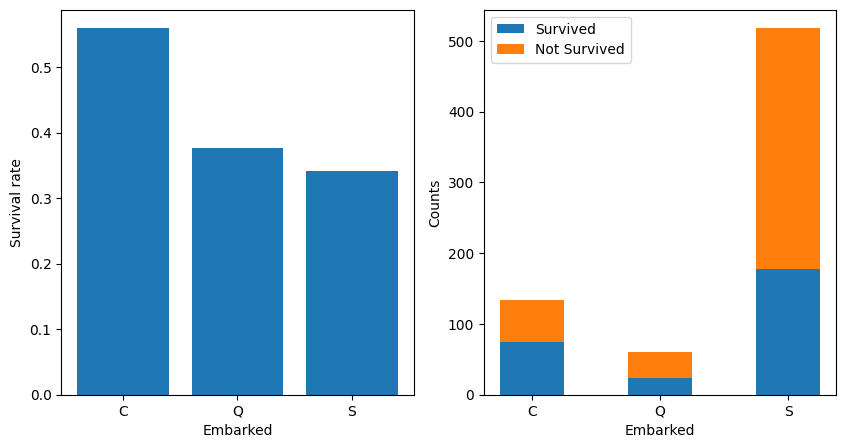

In [ ]:
plot_survival('Embarked')

### **Problem #4.17**

How did having a cabin affect survival rates?

#### **Solution**

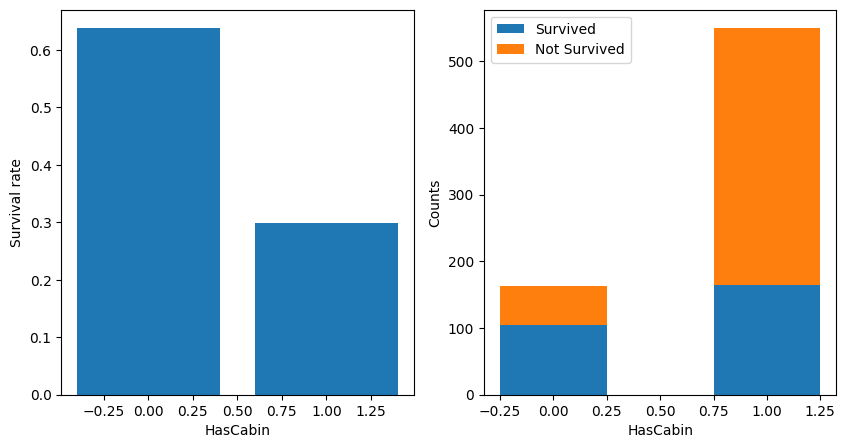

In [ ]:
plot_survival('HasCabin')

### **Wrapping Up**

Congratulations on completing a data science project! Not all data science projects include machine learning. Drawing insights from data through EDA, feature engineering, and visualizations is data science! In a later lab, you will continue your project with machine learning to make survival predictions for individual passengers.

---

# End of Notebook

© 2023 The Coding School, All rights reserved